In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import functions

# mean monthly values: Tl default land cover, 3 different locations 

In [2]:
'''
%%time

column = 'Qdftl'
print(column)

result_df = pd.DataFrame()

# langtang
folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/3mustangTL/default_land_cover'


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield(pd.read_csv(file_path))
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/TL_default_landcover_output/'
result_df.to_csv(output_path + '3mustang_long_term_mean_monthly_Qdftl_default_landcover.csv', index = False)

# result_df.to_csv(folder_path + '/long_term_mean_monthly_Q100_default_landcover.csv', index = False)



'''



"\n%%time\n\ncolumn = 'Qdftl'\nprint(column)\n\nresult_df = pd.DataFrame()\n\n# langtang\nfolder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/3mustangTL/default_land_cover'\n\n\n# Iterate over the files in the folders\nfor folder_name in os.listdir(folder_path):\n    # skip dsstore thing\n    if folder_name == '.DS_Store':\n        continue\n    # skip all csvs\n    if folder_name.endswith('.csv'):\n        continue\n    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')\n    if os.path.isfile(file_path):\n        \n        # calculate mean monthly value for given column \n        output_df = functions.calculate_monthly_sediment_yield(pd.read_csv(file_path))\n        # take the column \n        name_column = output_df[column]\n        # rename the columns \n        column_name = f'{column}_{folder_name}'\n        result_df[column_name] = name_column\n        result_df.columns = [col[-3:] for col in result_df.columns]\n\n\noutput_path = '/Users/varyabazil

# plots 

In [3]:
#read data 
output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/TL_default_landcover_output/'

langtang_monthlymean = pd.read_csv(output_path + '1langtang_long_term_mean_monthly_Qdftl_default_landcover.csv')
bagrot_monthlymean = pd.read_csv(output_path + '2bagrot_long_term_mean_monthly_Qdftl_default_landcover.csv')
mustang_monthlymean =  pd.read_csv(output_path + '3mustang_long_term_mean_monthly_Qdftl_default_landcover.csv')

# read_elevation
langtang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_langtang.csv')[['cellnr2','band_data']] 
bagrot_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_bagrot.csv')[['cellnr2','band_data']] 
mustang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_mustang.csv')[['cellnr2','band_data']] 
# 

# add elevation to the monthlymean data 

def add_elevation(elevation, df):
    # elevation = elevation.sort_values('band_data')
    elevation = elevation.transpose()
    elvlist = elevation.loc['cellnr2'].tolist()
    # order columns 
    df_ordered = df[elvlist]
    
    if elvlist == df_ordered.columns.tolist():
        print("columns: same")
    else:
        print("columns: not the same")
        
    # rename columns according to elevation
    df_ordered.columns = elevation.loc['band_data']
    
    return df_ordered

# add elevation as column names
langtang_monthlymean_df = add_elevation(langtang_elevation, langtang_monthlymean).reset_index()
bagrot_monthlymean_df = add_elevation(bagrot_elevation, bagrot_monthlymean).reset_index()
mustang_monthlymean_df = add_elevation(mustang_elevation, mustang_monthlymean).reset_index()




columns: same
columns: same
columns: same


In [4]:
def prepare_for_monthly_boxplots(df):
    df['month'] = df.index+1
    df = df.drop('index', axis =1)
    melted = pd.melt(df, id_vars=['month'], var_name='elevation', value_name='Qdftl')
    return melted

# make the data look the way you want it to look 
langtang_melted = prepare_for_monthly_boxplots(langtang_monthlymean_df)
bagrot_melted = prepare_for_monthly_boxplots(bagrot_monthlymean_df)
mustang_melted = prepare_for_monthly_boxplots(mustang_monthlymean_df)

# add the elevation bins
langtang_melted['elevation_bin'] = langtang_melted.apply(functions.bin_elevation200, axis=1)
bagrot_melted['elevation_bin'] = bagrot_melted.apply(functions.bin_elevation200, axis=1)
mustang_melted['elevation_bin'] = mustang_melted.apply(functions.bin_elevation200, axis=1)
# sort values per elevation bins 
langtang_melted = langtang_melted.sort_values('elevation_bin')
bagrot_melted = bagrot_melted.sort_values('elevation_bin')
mustang_melted = mustang_melted.sort_values('elevation_bin')
# remove zeros 
langtang_melted = langtang_melted[langtang_melted['Qdftl'] != 0]
bagrot_melted = bagrot_melted[bagrot_melted['Qdftl'] != 0]
mustang_melted = mustang_melted[mustang_melted['Qdftl'] != 0]

# add region name 
langtang_melted['region'] = 'langtang'
bagrot_melted['region'] = 'bagrot'
mustang_melted['region'] = 'mustang'

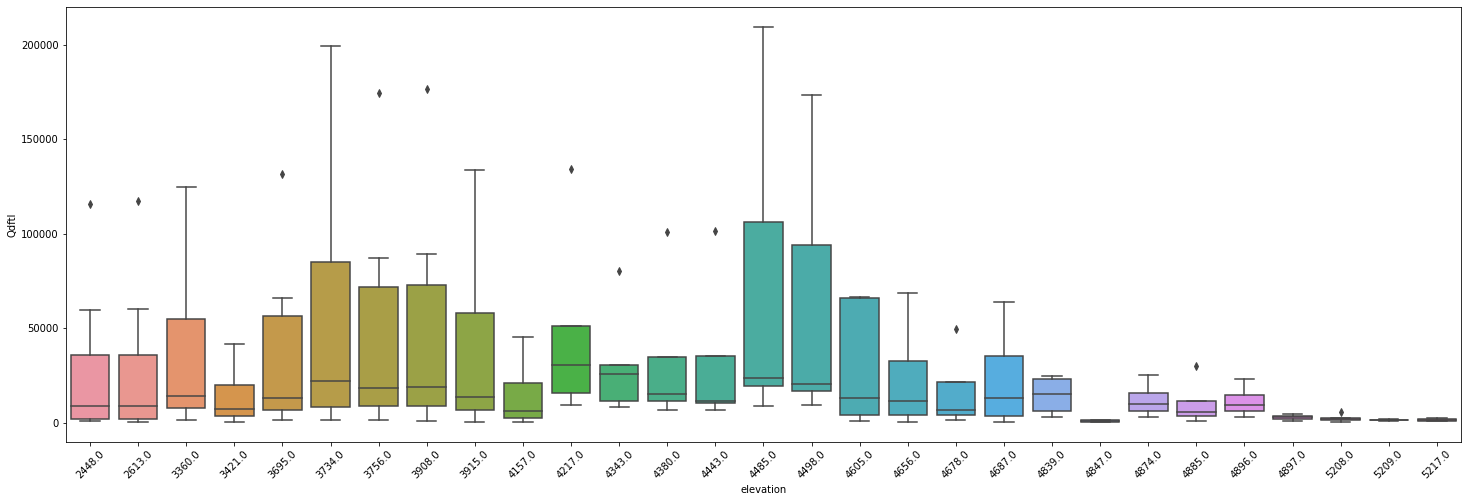

In [5]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='elevation', y='Qdftl', data=langtang_melted)

plt.xticks(rotation=45)
plt.show()

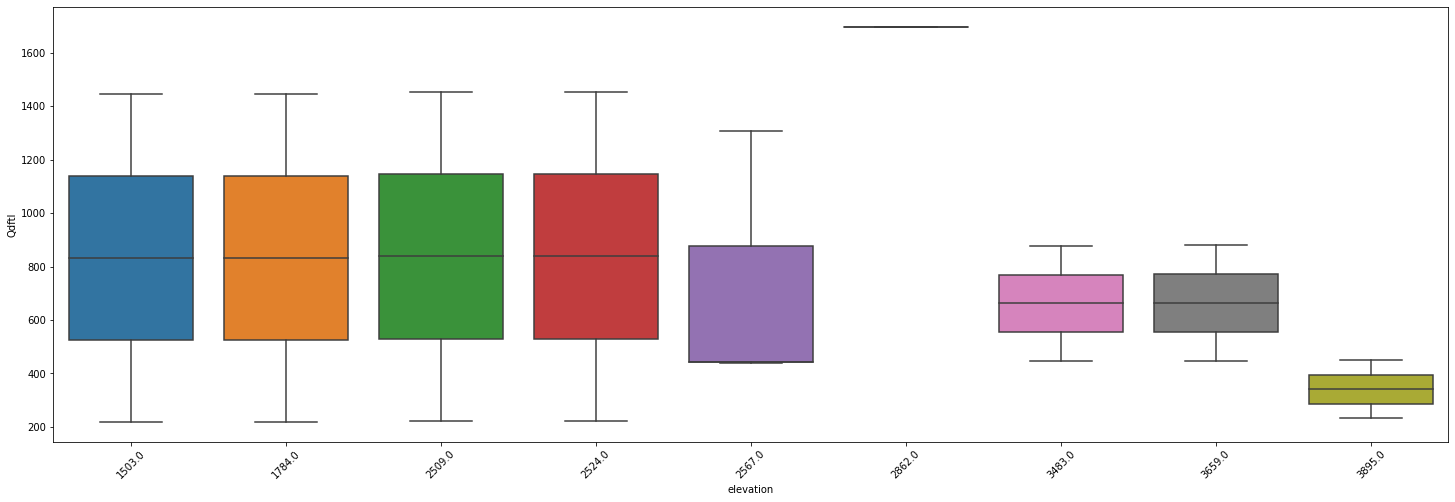

In [6]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='elevation', y='Qdftl', data=bagrot_melted)

plt.xticks(rotation=45)
plt.show()

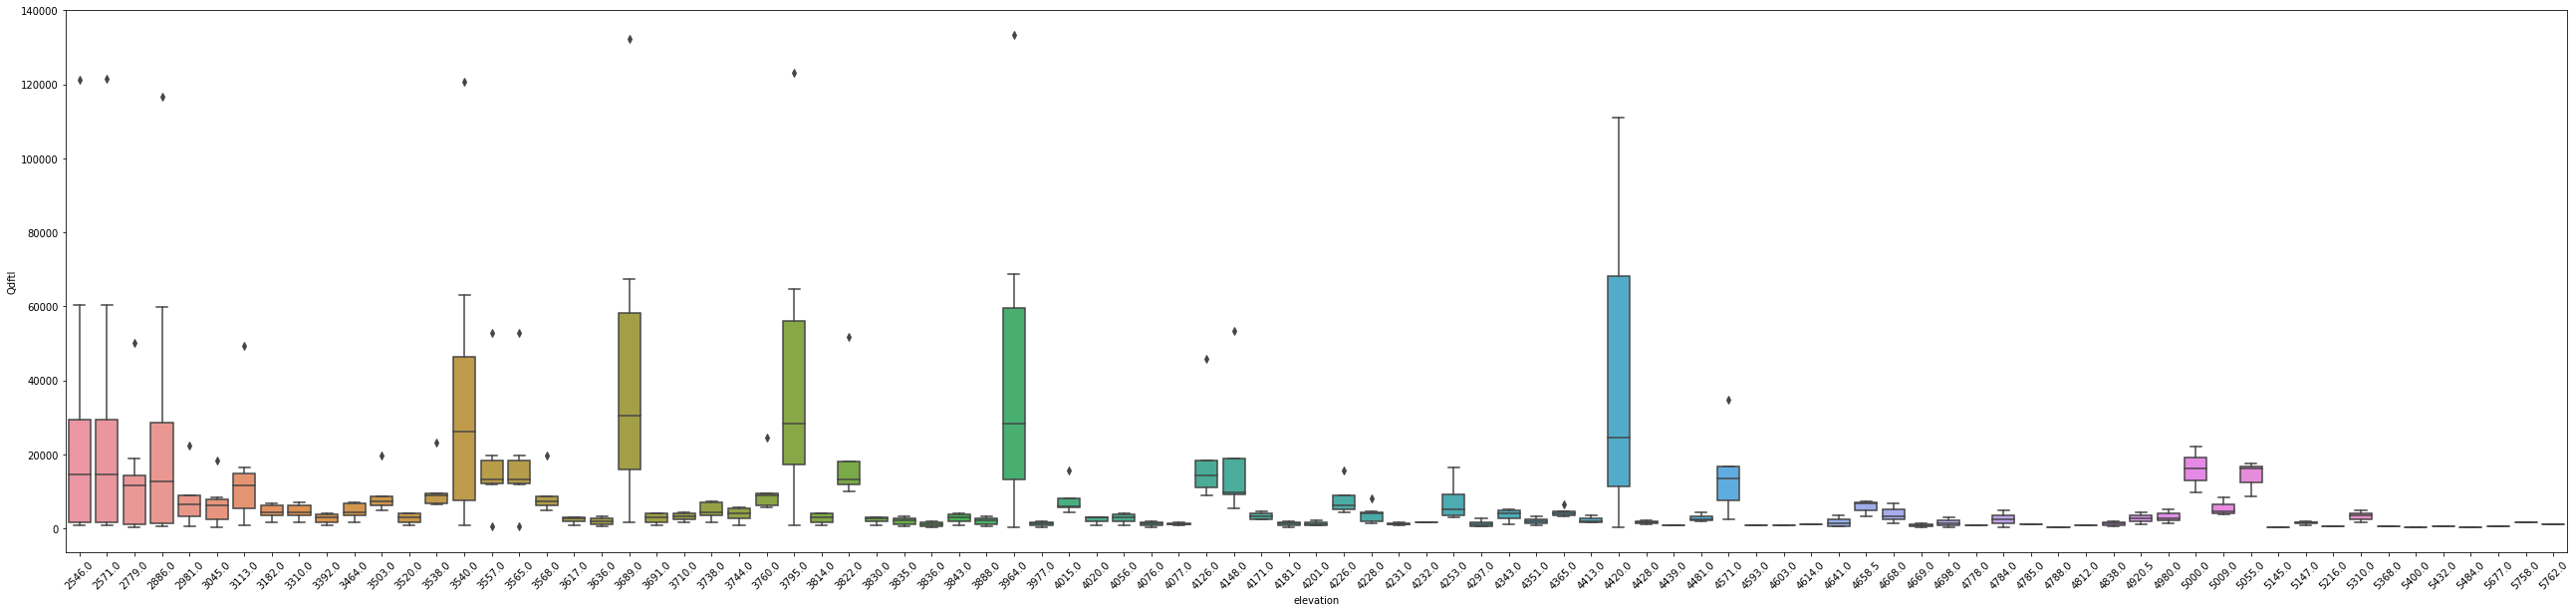

In [7]:
plt.figure(figsize=(45, 10))
sns.boxplot(x='elevation', y='Qdftl', data=mustang_melted)

plt.xticks(rotation=45)
plt.show()

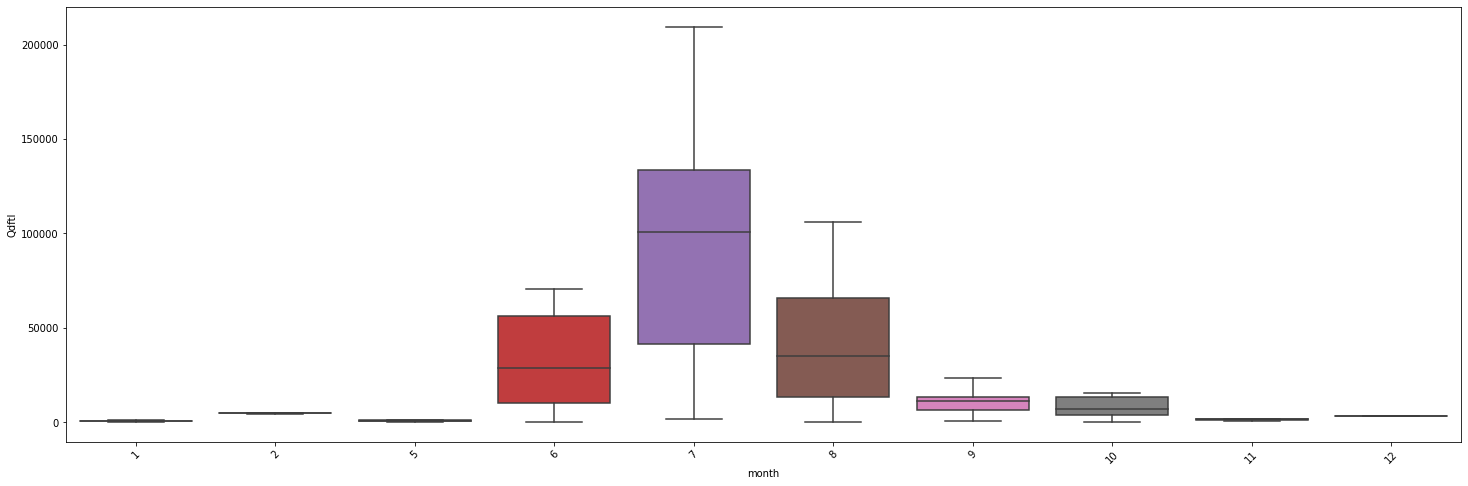

In [8]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='month', y='Qdftl', data=langtang_melted)

plt.xticks(rotation=45)
plt.show()

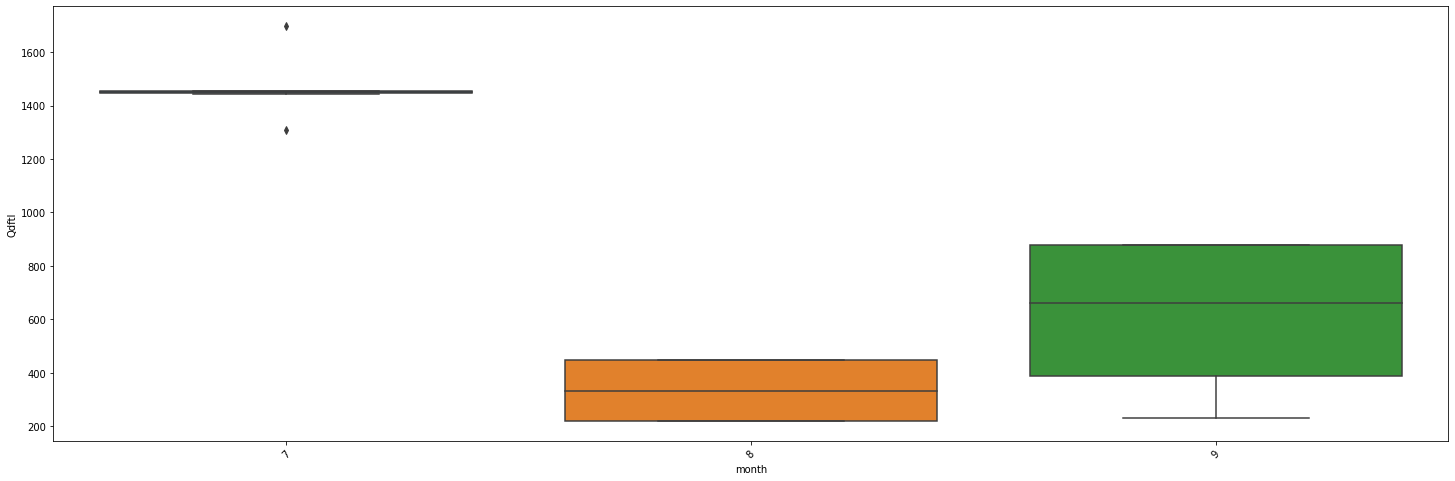

In [9]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='month', y='Qdftl', data=bagrot_melted)

plt.xticks(rotation=45)
plt.show()

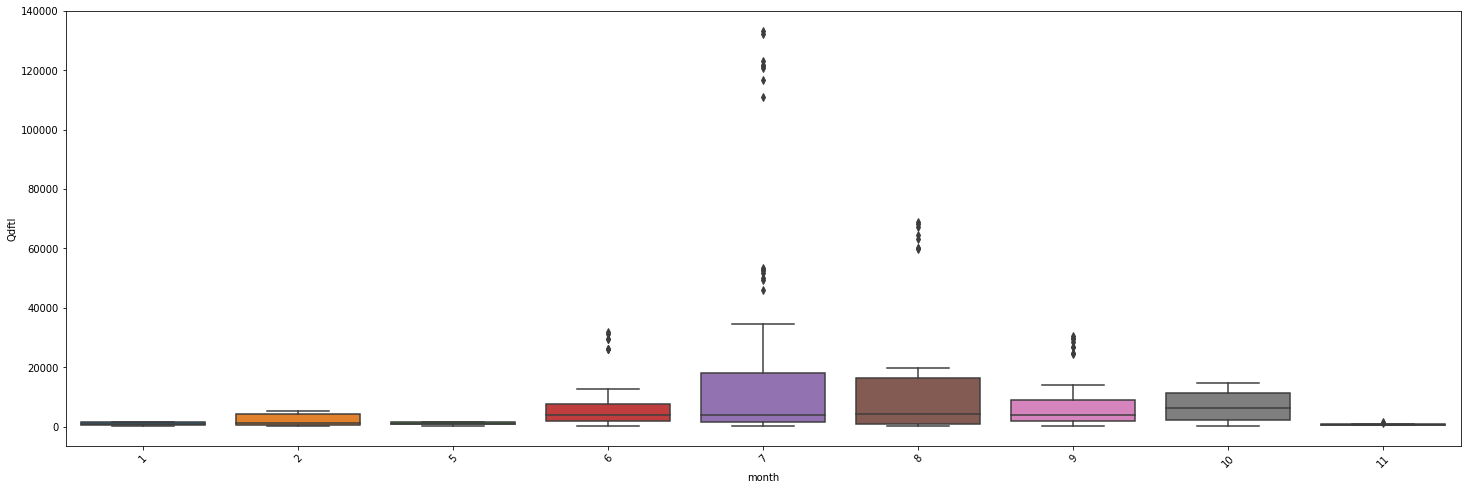

In [10]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='month', y='Qdftl', data=mustang_melted)

plt.xticks(rotation=45)
plt.show()

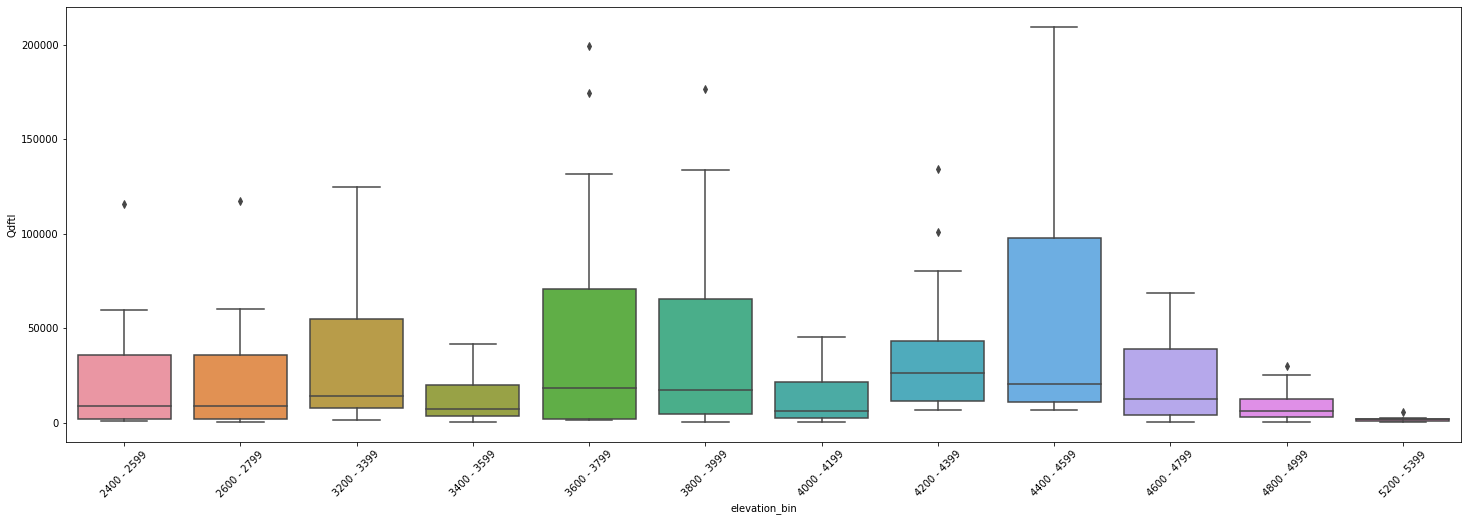

In [11]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='elevation_bin', y='Qdftl', data=langtang_melted)

plt.xticks(rotation=45)
plt.show()

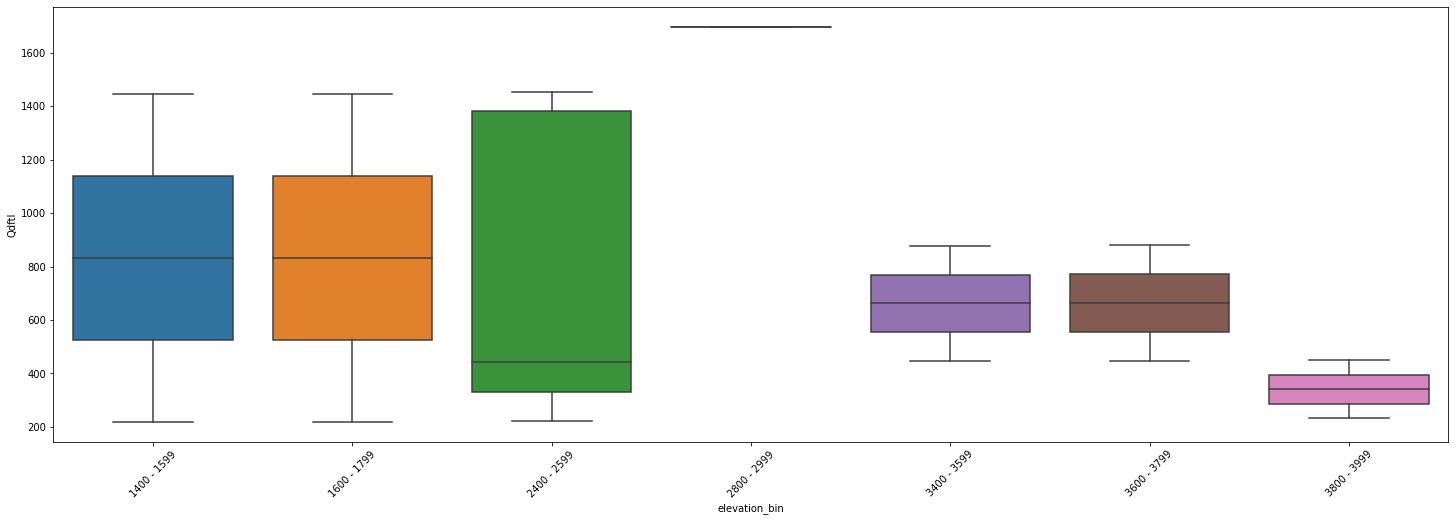

In [12]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='elevation_bin', y='Qdftl', data=bagrot_melted)

plt.xticks(rotation=45)
plt.show()

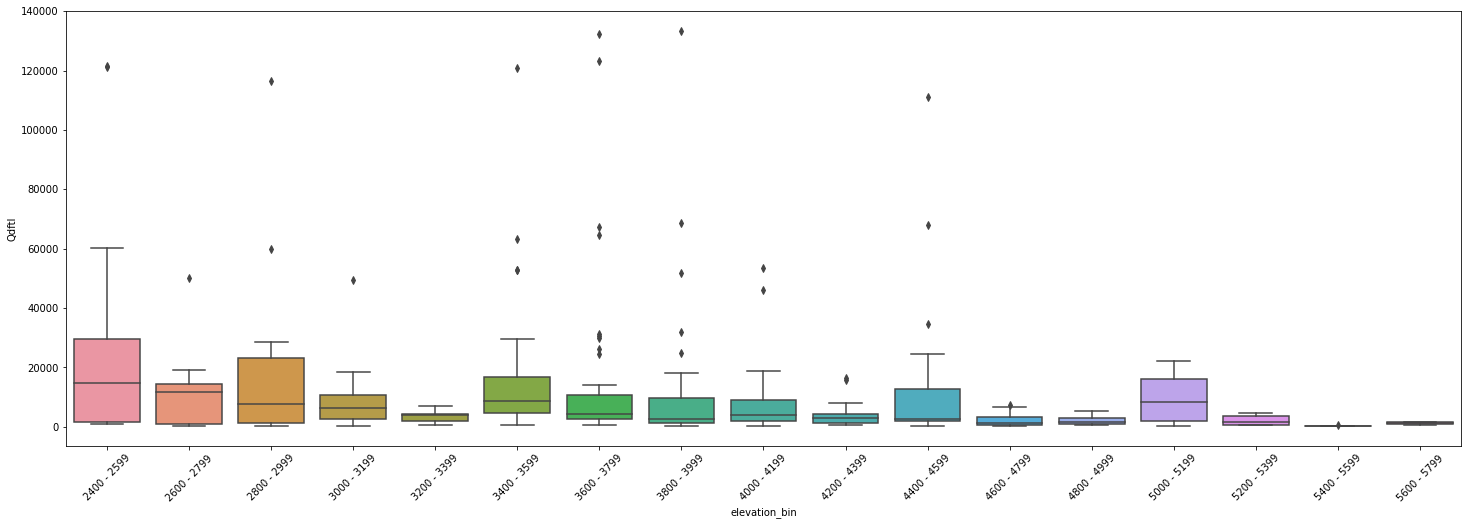

In [13]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='elevation_bin', y='Qdftl', data=mustang_melted)

plt.xticks(rotation=45)
plt.show()

## side by side

In [14]:



combined = langtang_melted.append(bagrot_melted, ignore_index = True)
combined = combined.append(mustang_melted, ignore_index = True)

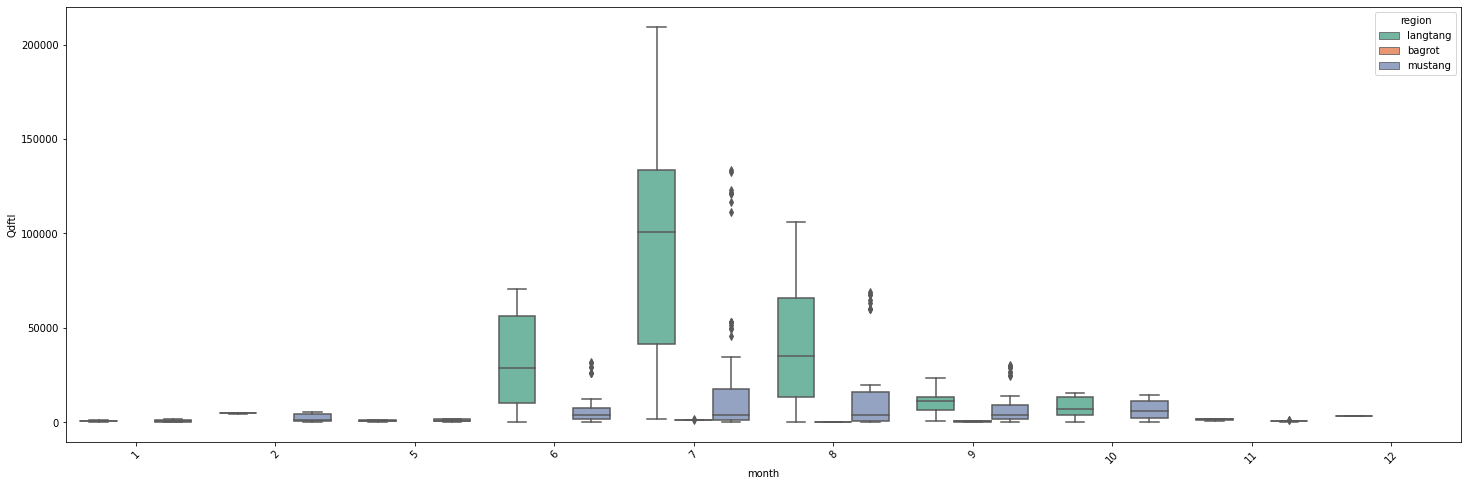

In [15]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='month', y='Qdftl', hue = 'region', data=combined, palette = 'Set2')

plt.xticks(rotation=45)
plt.show()

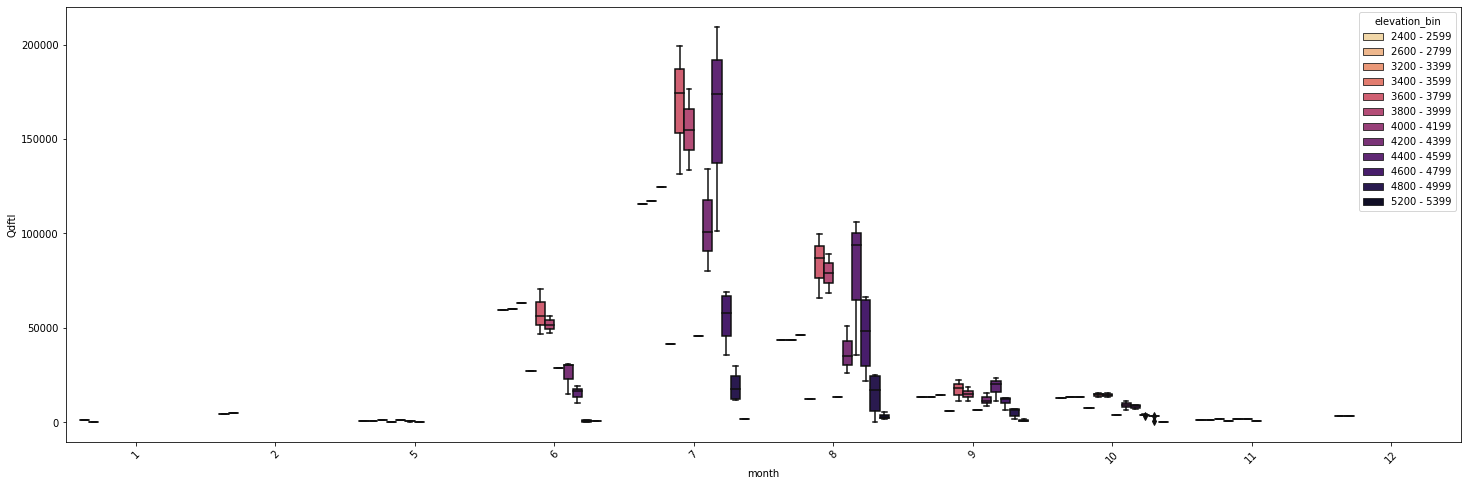

In [27]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='month', y='Qdftl', hue = 'elevation_bin', data=langtang_melted, palette = 'magma_r')

plt.xticks(rotation=45)
plt.show()

# mean per month within elevation bin 

In [20]:
%%time

column = 'Qdftl'
print(column)

result_df = pd.DataFrame()

# langtang
folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/default_land_cover'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/2bagrotTL/default_land_cover'
# folder_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/3mustangTL/default_land_cover'


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip dsstore thing
    if folder_name == '.DS_Store':
        continue
    # skip all csvs
    if folder_name.endswith('.csv'):
        continue
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
    if os.path.isfile(file_path):
        sediments = pd.read_csv(file_path)
        # calculate mean monthly value for given column 
        output_df = functions.calculate_monthly_sediment_yield_all(sediments, column)
        # take the column 
        name_column = output_df[column]
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


# output_path = '/Users/varyabazilova/Desktop/paper2/202405_modelruns/TL_default_landcover_output/'
# result_df.to_csv(output_path + '1langtang_monthly_Qdftl_default_landcover.csv', index = False)

# result_df.to_csv(folder_path + '/long_term_mean_monthly_Q100_default_landcover.csv', index = False)


result_df

Qdftl
CPU times: user 33.8 s, sys: 833 ms, total: 34.6 s
Wall time: 35 s


,20a,29a,23a,38a,12b,14a,12d,12c,31a,30b,...,19c,19d,13d,30a,13c,19b,13b,28a,22a,21a
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,216841.443088,0.0,0.0,0.0,289159.512185,178000.175261,0.0,0.0,0.0,0.0,...,241892.138901,287807.814266,0.0,0.0,263137.339203,257010.593168,247115.535457,0.0,0.0,174697.295421
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,49391.748625,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
849,0.000000,0.0,0.0,0.0,85518.733017,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,31430.926195,0.000000,15757.468525,0.0,0.0,0.000000
850,0.000000,0.0,0.0,0.0,130266.224177,39094.619251,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,64862.539880,0.000000,64783.733417,0.0,0.0,0.000000
851,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [21]:
result_df.columns

Index(['20a', '29a', '23a', '38a', '12b', '14a', '12d', '12c', '31a', '30b',
       '30d', '30c', '13a', '19a', '21c', '21d', '22b', '28b', '22d', '22c',
       '21b', '28c', '28d', '23d', '23c', '20b', '29c', '29d', '20c', '20d',
       '23b', '29b', '31d', '12a', '31c', '14d', '38b', '14c', '31b', '14b',
       '38d', '38c', '19c', '19d', '13d', '30a', '13c', '19b', '13b', '28a',
       '22a', '21a'],
      dtype='object')

# values for each month, TL, default land cover, 3 locations 

In [17]:
# result_df